In [1]:
'''
Pandas Homework with IMDb data
'''

'\nPandas Homework with IMDb data\n'

In [2]:
'''
BASIC LEVEL
'''

import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt


In [5]:
# read in 'imdb_1000.csv' and store it in a DataFrame named movies
movies=pd.read_table('C:\Users\Brittany\DAT9-class\WEEK5\DAT-DC-9\data\imdb_1000.csv', sep=",")
movies.head(5)
movies.tail(5)

,star_rating,title,content_rating,genre,duration,actors_list
974,7.4,Tootsie,PG,Comedy,116,"[u'Dustin Hoffman', u'Jessica Lange', u'Teri G..."
975,7.4,Back to the Future Part III,PG,Adventure,118,"[u'Michael J. Fox', u'Christopher Lloyd', u'Ma..."
976,7.4,Master and Commander: The Far Side of the World,PG-13,Action,138,"[u'Russell Crowe', u'Paul Bettany', u'Billy Bo..."
977,7.4,Poltergeist,PG,Horror,114,"[u'JoBeth Williams', u""Heather O'Rourke"", u'Cr..."
978,7.4,Wall Street,R,Crime,126,"[u'Charlie Sheen', u'Michael Douglas', u'Tamar..."


In [4]:
# check the number of rows and columns
movies.shape

#There are 979 rows (1 header row, 978 data rows), and 6 columns.

(979, 6)

In [6]:
# check the data type of each column

movies.dtypes

#Star Rating is Float, Title/Content/Genre/Actors is String Object, Duration is Int.

star_rating       float64
title              object
content_rating     object
genre              object
duration            int64
actors_list        object
dtype: object

In [7]:
# calculate the average movie duration

movies.duration.mean()

#the Mean is 120.97 Minutes, just over 2 Hours

120.97957099080695

In [8]:
# sort the DataFrame by duration to find the shortest and longest movies

movies.sort('duration').head(10)
#The shortest film is Freaks at 64 minutes

#movies.sort('duration').tail(10)
#The longest film is Hamlet at 242 minutes

,star_rating,title,content_rating,genre,duration,actors_list
389,8.0,Freaks,UNRATED,Drama,64,"[u'Wallace Ford', u'Leila Hyams', u'Olga Bacla..."
338,8.0,Battleship Potemkin,UNRATED,History,66,"[u'Aleksandr Antonov', u'Vladimir Barsky', u'G..."
258,8.1,The Cabinet of Dr. Caligari,UNRATED,Crime,67,"[u'Werner Krauss', u'Conrad Veidt', u'Friedric..."
293,8.1,Duck Soup,PASSED,Comedy,68,"[u'Groucho Marx', u'Harpo Marx', u'Chico Marx']"
88,8.4,The Kid,NOT RATED,Comedy,68,"[u'Charles Chaplin', u'Edna Purviance', u'Jack..."
742,7.6,Following,R,Mystery,69,"[u'Jeremy Theobald', u'Alex Haw', u'Lucy Russe..."
351,8.0,Frankenstein,UNRATED,Horror,70,"[u'Colin Clive', u'Mae Clarke', u'Boris Karloff']"
938,7.4,Alice in Wonderland,G,Animation,75,"[u'Kathryn Beaumont', u'Ed Wynn', u'Richard Ha..."
405,7.9,The Bride of Frankenstein,NOT RATED,Horror,75,"[u'Boris Karloff', u'Elsa Lanchester', u'Colin..."
303,8.0,The Nightmare Before Christmas,PG,Animation,76,"[u'Danny Elfman', u'Chris Sarandon', u""Catheri..."


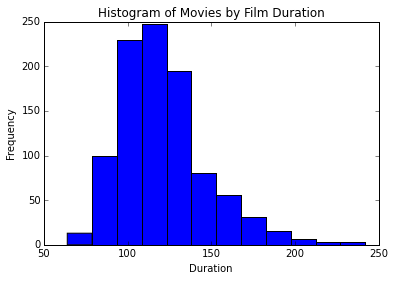

In [10]:
# create a histogram of duration, choosing an "appropriate" number of bins

movies.duration.plot(kind='hist', bins=12, title="Histogram of Movies by Film Duration")
plt.xlabel("Duration")
plt.ylabel("Frequency")



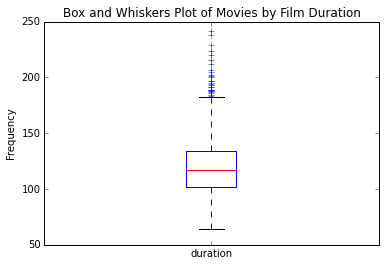

In [11]:
# use a box plot to display that same data

movies.duration.plot(kind='box', title="Box and Whiskers Plot of Movies by Film Duration")
plt.ylabel("Frequency")



In [12]:
'''
INTERMEDIATE LEVEL
'''

# count how many movies have each of the content ratings
movies.star_rating.value_counts()

7.6    124
7.8    116
7.7    113
7.5    108
8.1    103
8.0     97
7.9     75
8.2     51
7.4     49
8.3     43
8.4     37
8.5     23
8.6     15
8.7     10
8.9      6
8.8      5
9.0      1
9.3      1
9.1      1
9.2      1
dtype: int64

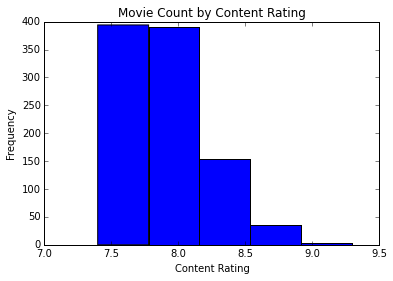

In [13]:
# use a visualization to display that same data, including a title and x and y labels

movies.star_rating.plot(kind='hist', bins=5,title="Movie Count by Content Rating")
plt.xlabel("Content Rating")
plt.ylabel("Frequency")



In [14]:
# convert the following content ratings to "UNRATED": NOT RATED, APPROVED, PASSED, GP

movies.content_rating.replace('UNRATED','NOT RATED', inplace=True)
movies.content_rating.replace('R','NOT RATED', inplace=True)
movies.content_rating.replace('APPROVED','NOT RATED', inplace=True)
movies.content_rating.replace('GP','NOT RATED', inplace=True)

movies.content_rating.value_counts()

NOT RATED    613
PG-13        189
PG           123
G             32
PASSED         7
NC-17          7
X              4
TV-MA          1
dtype: int64

In [15]:
# convert the following content ratings to "NC-17": X, TV-MA

movies.content_rating.replace('X','NC-17', inplace=True)
movies.content_rating.replace('TV-MA','NC-17', inplace=True)

movies.content_rating.value_counts()

NOT RATED    613
PG-13        189
PG           123
G             32
NC-17         12
PASSED         7
dtype: int64

In [16]:
# count the number of missing values in each column

movies.isnull().sum()


star_rating       0
title             0
content_rating    3
genre             0
duration          0
actors_list       0
dtype: int64

In [17]:
# if there are missing values: examine them, then fill them in with "reasonable" values
movies.fillna(value='NOT RATED', inplace=True)

movies.isnull().sum()


star_rating       0
title             0
content_rating    0
genre             0
duration          0
actors_list       0
dtype: int64

In [18]:
# calculate the average star rating for movies 2 hours or longer,
# and compare that with the average star rating for movies shorter than 2 hours

movies[movies.duration>=120].duration.mean()
#Average for 2 Hours or Longer: 142.458 Minutes

movies[movies.duration<120].duration.mean()
#Average for 2 Hours or Longer: 102.405 Minutes

102.40571428571428

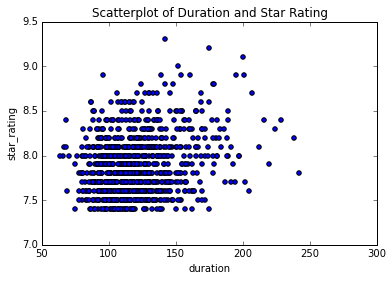

In [19]:
# use a visualization to detect whether there is a relationship between duration and star rating


movies.plot(kind='scatter', x='duration', y='star_rating',title="Scatterplot of Duration and Star Rating")

#There appears to be no linear relationship between duration and star rating



In [21]:
# calculate the average duration for each genre

movies.groupby('genre').duration.mean()


genre
Action       126.485294
Adventure    134.840000
Animation     96.596774
Biography    131.844156
Comedy       107.602564
Crime        122.298387
Drama        126.539568
Family       107.500000
Fantasy      112.000000
Film-Noir     97.333333
History       66.000000
Horror       102.517241
Mystery      115.625000
Sci-Fi       109.000000
Thriller     114.200000
Western      136.666667
Name: duration, dtype: float64

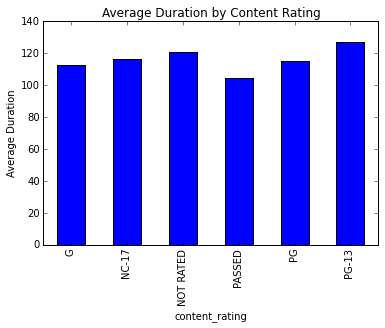

In [22]:
'''
ADVANCED LEVEL
'''

# visualize the relationship between content rating and duration

movies.groupby('content_rating').duration.mean().plot(kind='bar', stacked=True, title="Average Duration by Content Rating")

plt.ylabel("Average Duration")



In [23]:
# determine the top rated movie (by star rating) for each genre
#movies.groupby('genre').star_rating.max()
pd.set_option('display.height', 1000)
pd.set_option('display.max_rows', 5000)
pd.set_option('display.max_columns', 5000)
pd.set_option('display.width', 10000)


genreList=set(movies.genre)

for item in genreList:
        maxRating=movies[movies.genre==item].star_rating.max()
        maxRatingFilm=movies[(movies.genre==item) & (movies.star_rating==maxRating)].title
        print item +"-"+ maxRatingFilm+"-"+str(maxRating) 
        

height has been deprecated.

38    Mystery-Rear Window-8.6
Name: title, dtype: object
338    History-Battleship Potemkin-8.0
Name: title, dtype: object
145    Sci-Fi-Blade Runner-8.2
Name: title, dtype: object
468    Family-E.T. the Extra-Terrestrial-7.9
Name: title, dtype: object
39    Horror-Psycho-8.6
Name: title, dtype: object
350    Thriller-Shadow of a Doubt-8.0
Name: title, dtype: object
105    Film-Noir-The Third Man-8.3
Name: title, dtype: object
0    Crime-The Shawshank Redemption-9.3
Name: title, dtype: object
5    Drama-12 Angry Men-8.9
9      Drama-Fight Club-8.9
Name: title, dtype: object
638    Fantasy-The City of Lost Children-7.7
Name: title, dtype: object
30    Animation-Spirited Away-8.6
Name: title, dtype: object
7    Adventure-The Lord of the Rings: The Return of...
Name: title, dtype: object
3    Action-The Dark Knight-9.0
Name: title, dtype: object
25    Comedy-Life Is Beautiful-8.6
29          Comedy-City Lights-8.6
35         Comedy-Modern Times-8.6
Name: title

In [24]:
# check if there are multiple movies with the same title, and if so, determine if they are actually duplicates

movies[movies.title.duplicated()]

#Not actually duplicates.

,star_rating,title,content_rating,genre,duration,actors_list
482,7.8,The Girl with the Dragon Tattoo,NOT RATED,Crime,152,"[u'Michael Nyqvist', u'Noomi Rapace', u'Ewa Fr..."
905,7.5,Dracula,NOT RATED,Horror,128,"[u'Gary Oldman', u'Winona Ryder', u'Anthony Ho..."
924,7.5,Les Miserables,PG-13,Crime,134,"[u'Liam Neeson', u'Geoffrey Rush', u'Uma Thurm..."
936,7.4,True Grit,NOT RATED,Adventure,128,"[u'John Wayne', u'Kim Darby', u'Glen Campbell']"


In [25]:
# calculate the average star rating for each genre, but only include genres with at least 10 movies

movies.groupby('genre').star_rating.mean()[movies.groupby('genre').title.count()>=10]
    
            
            


genre
Action       7.884559
Adventure    7.933333
Animation    7.914516
Biography    7.862338
Comedy       7.822436
Crime        7.916935
Drama        7.902518
Horror       7.806897
Mystery      7.975000
Name: star_rating, dtype: float64

In [61]:
# option 1: manually create a list of relevant genres, then filter using that list

genresLiked=['Comedy','Crime','Horror','History']

genreList=set(movies.genre)

for item in genreList:
        if item in genresLiked:
            print "Genre Selected: "+ item + " # of Movies: "+str(movies[movies.genre==item].genre.count())
        
movies.genre.value_counts()

Genre Selected: History # of Movies: 1
Genre Selected: Horror # of Movies: 29
Genre Selected: Crime # of Movies: 124
Genre Selected: Comedy # of Movies: 156


Drama        278
Comedy       156
Action       136
Crime        124
Biography     77
Adventure     75
Animation     62
Horror        29
Mystery       16
Western        9
Thriller       5
Sci-Fi         5
Film-Noir      3
Family         2
Fantasy        1
History        1
dtype: int64

In [24]:
# option 2: automatically create a list of relevant genres by saving the value_counts and then filtering

#i don't know what this means?

In [90]:
# option 3: calculate the average star rating for all genres, then filter using a boolean Series


movies.groupby('genre').star_rating.mean()[movies.groupby('genre').star_rating.mean()<7.85]



genre
Comedy      7.822436
Fantasy     7.700000
Horror      7.806897
Thriller    7.680000
Name: star_rating, dtype: float64

In [91]:
# option 4: aggregate by count and mean, then filter using the count

# Not sure what this means.



AttributeError: 'DataFrame' object has no attribute 'value_counts'

In [27]:
'''
BONUS
'''

# Figure out something "interesting" using the actors data!


'\nBONUS\n'